<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT01627301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 17)

In [ ]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT01627301.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,cohort reference event-condition,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),heart_or_vascular_disease-condition documentation date-time-days from reference,illicit_drug_use-health factor,safe_alcohol_use-health factor,not_pregnant-health factor,autonomic_dysfunction-condition documentation date-time-days from reference,maoi_use-medication (administered),systemic_disease-condition documentation date-time-days from reference,clonidine_use-medication (administered)
0,1964.916667,Male,"Post-traumatic stress disorder, chronic",63.462583,125.170794,False,QM ILLICIT DRUG USE: NO,ALCOHOL NOT USED IN PAST YEAR,False,False,False,False,False
1,1979.583333,Male,"Post-traumatic stress disorder, chronic",73.005036,120.009113,False,QM ILLICIT DRUG USE: NO,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False
2,1947.166667,Male,"Post-traumatic stress disorder, chronic",74.983491,125.974548,False,QM ILLICIT DRUG USE: NO,ALCOHOL NOT USED IN PAST YEAR,False,False,False,False,False
3,1946.250000,Male,"Post-traumatic stress disorder, chronic",66.011421,124.985830,False,censored,censored,False,False,False,False,False
4,1970.416667,Male,"Post-traumatic stress disorder, chronic",74.017543,127.002805,False,QM ILLICIT DRUG USE: NO,ALCOHOL NOT USED IN PAST YEAR,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1986.333333,Male,Prolonged posttraumatic stress disorder,74.005899,122.999792,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False
1136,1948.583333,Male,Prolonged posttraumatic stress disorder,76.007714,127.012502,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False
1137,1982.666667,Male,Prolonged posttraumatic stress disorder,78.010588,123.986925,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False
1138,1955.583333,Male,Prolonged posttraumatic stress disorder,78.011988,125.988168,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False


In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 13 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   date of birth                                                                    1140 non-null   float64
 1   gender at birth                                                                  1140 non-null   object 
 2   cohort reference event-condition                                                 1140 non-null   object 
 3   blood_pressure-bp (diastolic)                                                    1140 non-null   float64
 4   blood_pressure-bp (systolic)                                                     1140 non-null   float64
 5   heart_or_vascular_disease-condition documentation date-time-days from reference  1140 non-null   bool   
 6   illicit_

In [ ]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                                                                      0.0
gender at birth                                                                    0.0
cohort reference event-condition                                                   0.0
blood_pressure-bp (diastolic)                                                      0.0
blood_pressure-bp (systolic)                                                       0.0
heart_or_vascular_disease-condition documentation date-time-days from reference    0.0
illicit_drug_use-health factor                                                     0.0
safe_alcohol_use-health factor                                                     0.0
not_pregnant-health factor                                                         0.0
autonomic_dysfunction-condition documentation date-time-days from reference        0.0
maoi_use-medication (administered)                                                 0.0
systemic_disease-condition documentation da

In [ ]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,cohort reference event-condition,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),heart_or_vascular_disease-condition documentation date-time-days from reference,illicit_drug_use-health factor,safe_alcohol_use-health factor,not_pregnant-health factor,autonomic_dysfunction-condition documentation date-time-days from reference,maoi_use-medication (administered),systemic_disease-condition documentation date-time-days from reference,clonidine_use-medication (administered),age
0,1965,Male,"Post-traumatic stress disorder, chronic",63.462583,125.170794,False,QM ILLICIT DRUG USE: NO,ALCOHOL NOT USED IN PAST YEAR,False,False,False,False,False,58
1,1980,Male,"Post-traumatic stress disorder, chronic",73.005036,120.009113,False,QM ILLICIT DRUG USE: NO,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,43
2,1970,Male,"Post-traumatic stress disorder, chronic",74.017543,127.002805,False,QM ILLICIT DRUG USE: NO,ALCOHOL NOT USED IN PAST YEAR,False,False,False,False,False,53
3,1978,Male,"Post-traumatic stress disorder, chronic",70.993227,126.000159,False,PC NEW ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,45
4,1988,Male,"Post-traumatic stress disorder, chronic",76.998335,121.976456,False,QM ILLICIT DRUG USE: NO,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,1966,Female,Prolonged posttraumatic stress disorder,79.002847,125.971198,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,57
333,1978,Male,Prolonged posttraumatic stress disorder,69.991533,120.014008,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,45
334,1986,Male,Prolonged posttraumatic stress disorder,74.005899,122.999792,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,37
335,1983,Male,Prolonged posttraumatic stress disorder,78.010588,123.986925,False,PC EST ILLICIT DRUGS NEVER USED,ALCOHOL USE WITHIN SAFE LIMITS,False,False,False,False,False,40


In [ ]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
cohort reference event-condition                                                   0.000000
heart_or_vascular_disease-condition documentation date-time-days from reference    0.000000
illicit_drug_use-health factor                                                     0.000000
safe_alcohol_use-health factor                                                     0.000000
not_pregnant-health factor                                                         5.341246
autonomic_dysfunction-condition documentation date-time-days from reference        0.000000
maoi_use-medication (administered)                                                 0.000000
systemic_disease-condition documentation date-time-days from reference             0.000000
clonidine_use-medication (administered)                                            0.000000
dtype: float64


In [ ]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

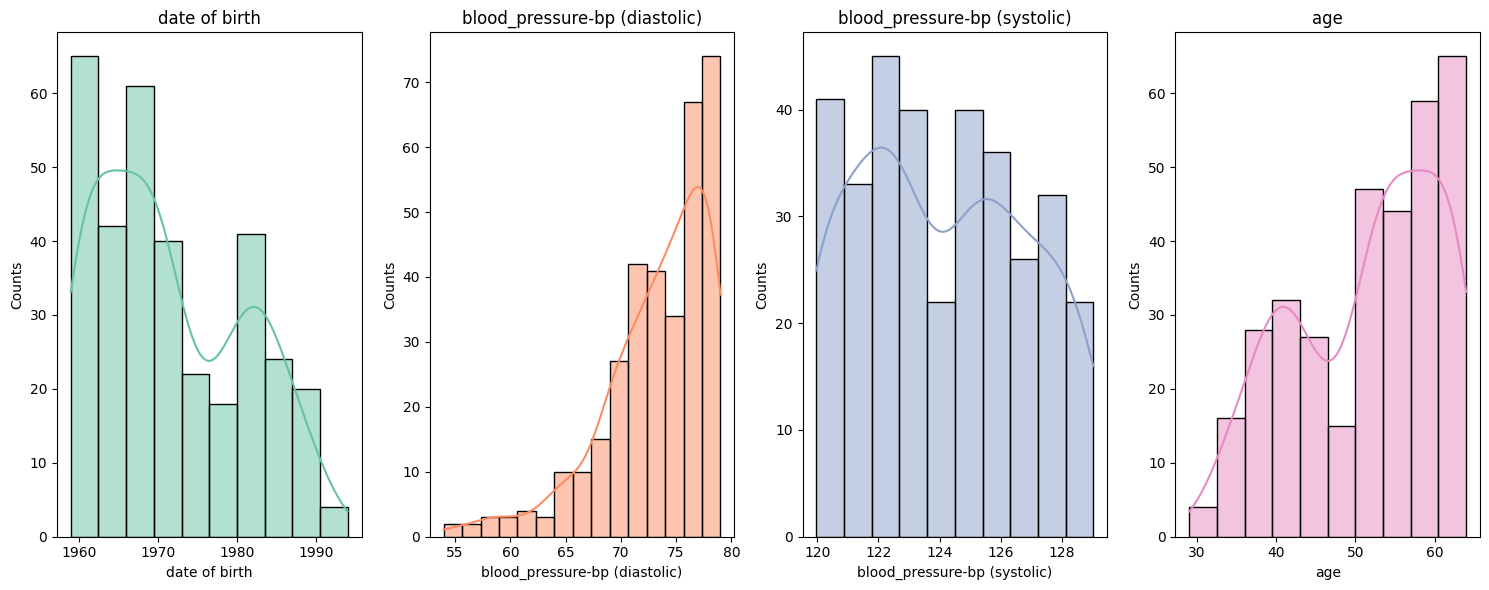

-1

In [ ]:
numeric_cols = cohort.select_dtypes(include=['number']).columns 
plot_util(cohort,numeric_cols,'hist',figsize=(15,6))

In [ ]:
# Calculate descriptive statistics
cols_to_plot = numeric_cols
stats = cohort[cols_to_plot].describe()
stats

,date of birth,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),age
count,337.000000,337.000000,337.000000,337.000000
mean,1971.554896,73.334324,124.100912,51.445104
std,9.234903,4.957358,2.798044,9.234903
min,1959.000000,53.960643,119.971279,29.000000
25%,1964.000000,70.989014,121.977221,43.000000
50%,1970.000000,74.017543,123.986925,53.000000
75%,1980.000000,77.013683,126.099213,59.000000
max,1994.000000,79.018876,129.028415,64.000000


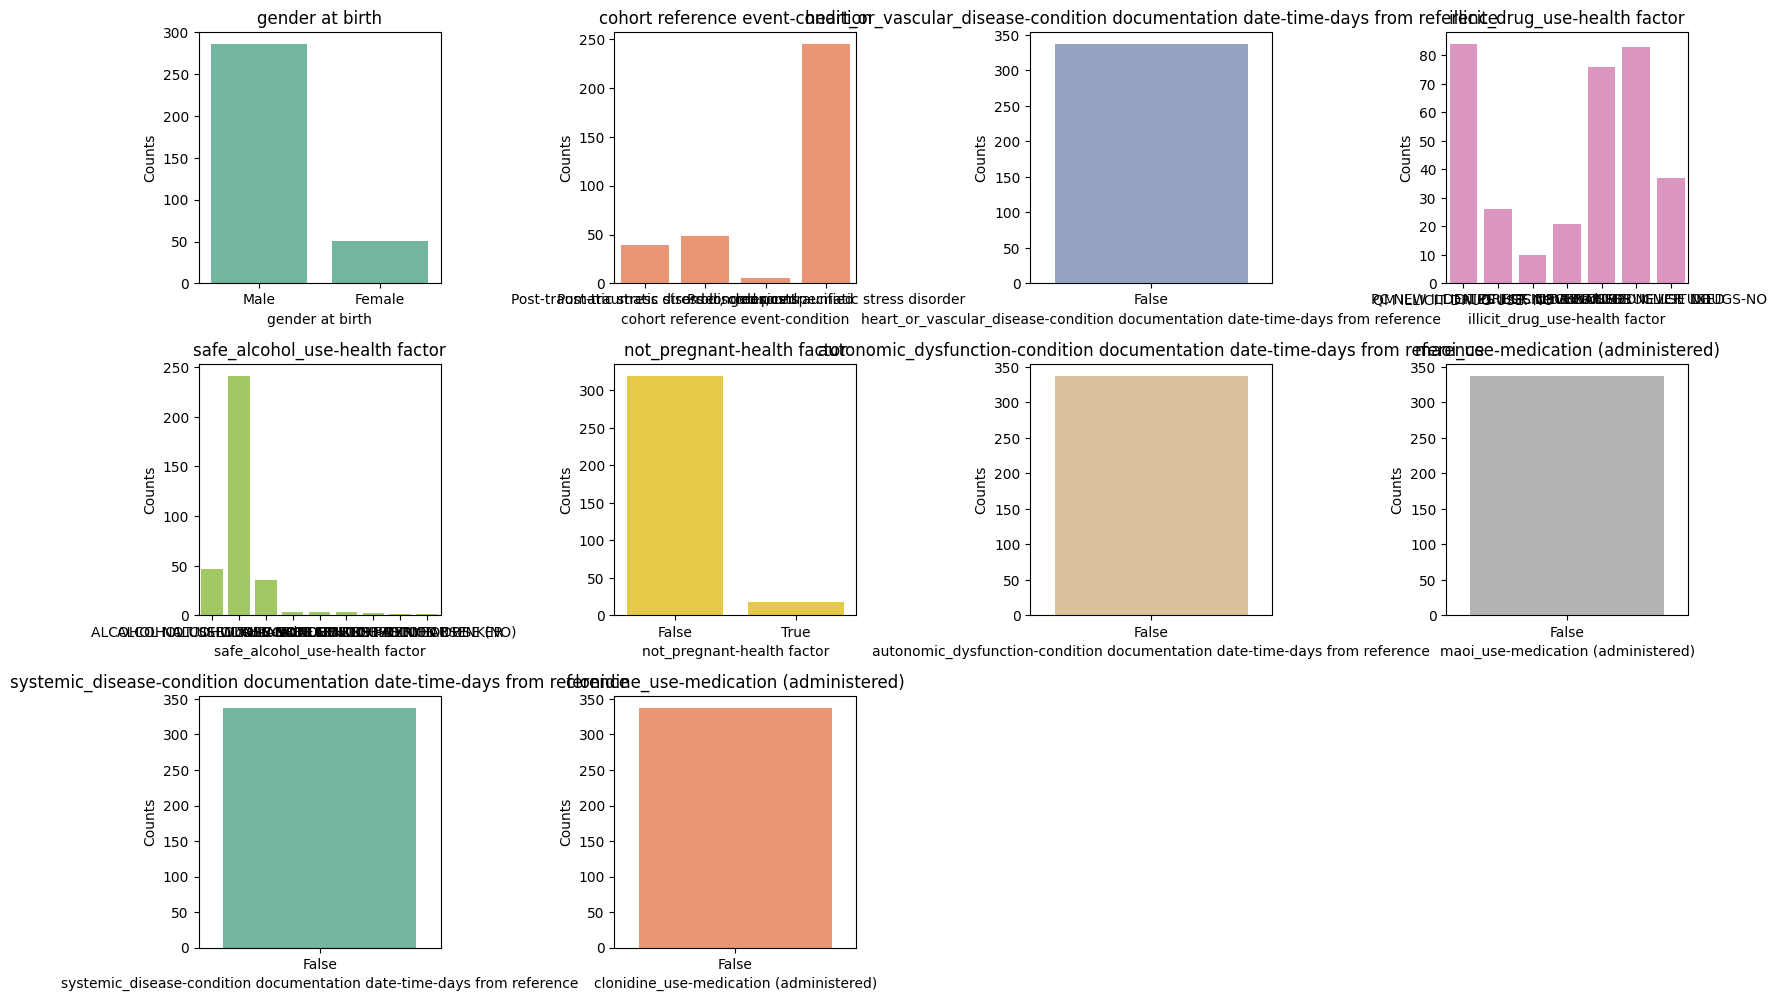

-1

In [ ]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(17,13))

In [ ]:
cohort.select_dtypes(exclude=['number']).columns

Index(['gender at birth', 'cohort reference event-condition',
       'heart_or_vascular_disease-condition documentation date-time-days from reference',
       'illicit_drug_use-health factor', 'safe_alcohol_use-health factor',
       'not_pregnant-health factor',
       'autonomic_dysfunction-condition documentation date-time-days from reference',
       'maoi_use-medication (administered)',
       'systemic_disease-condition documentation date-time-days from reference',
       'clonidine_use-medication (administered)'],
      dtype='object')

In [ ]:
for attribute in nonnumeric_columns:
  print(cohort[attribute].value_counts())

Male      286
Female     51
Name: gender at birth, dtype: int64
Prolonged posttraumatic stress disorder        245
Post-traumatic stress disorder, unspecified     48
Post-traumatic stress disorder, chronic         39
censored                                         5
Name: cohort reference event-condition, dtype: int64
False    337
Name: heart_or_vascular_disease-condition documentation date-time-days from reference, dtype: int64
QM ILLICIT DRUG USE: NO            84
ILLICIT DRUG USE NO                83
PC EST ILLICIT DRUGS NEVER USED    76
SA-USED ILLICIT DRUGS-NO           37
PC NEW ILLICIT DRUGS NEVER USED    26
censored                           21
DENIES ILLICIT DRUG USE            10
Name: illicit_drug_use-health factor, dtype: int64
ALCOHOL USE WITHIN SAFE LIMITS    241
ALCOHOL NOT USED IN PAST YEAR      47
censored                           36
ALCOHOL USE-NONDRINKER >1YR         3
DOES NOT USE ALCOHOL                3
ALCOHOL NO USE PAST YEAR            3
ALCOHOL USE DENIES US

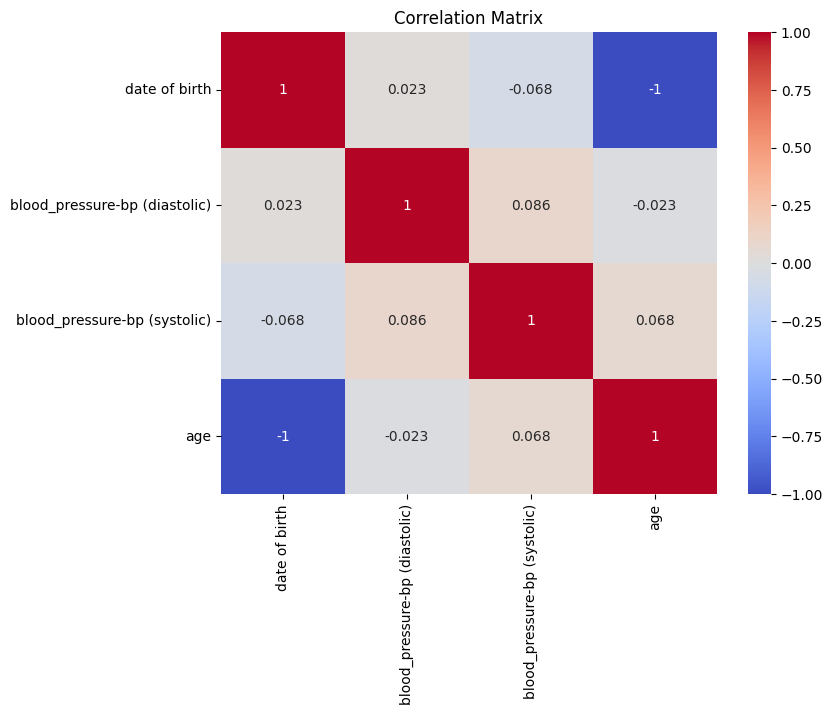

In [ ]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()